In [1]:
from baf2sql2unidec import *
import matplotlib.pyplot as plt
import os
import unidec
from unidec.metaunidec.mudeng import MetaUniDec
from unidec import tools as ud
import pandas as pd
from meta_processing import *

### Updates:
- Now runs through pip installed unidec 
- Improved matching algorithm
- Added upload from .d files using baf2sql (much faster than mzML)


In [2]:
# path = "D:\\WORK\\20230710 DOE_CTB H6_5M_DAmp\\testing\\20230710 4C_24h_1.d"
# directory = "D:\\WORK\\20230710 DOE_CTB H6_5M_DAmp\\24h"
# directory = "D:\\WORK\\20230710 DOE_CTB H6_5M_DAmp\\testing"
directory = "D:\\charlie HRMS data\\PDRA Ocr23-Jan24 data\\20240123\\4 dC"

scans = [434, 481]
# scans = [444, 500]
scans = [427, 502]

masslist = [13597.42, 13151.97, 12559.36]
names = ["CTB-H6", "CTB-LPETGVSEYG", "CTB-LPET"]

masslist = [11814, 12488, 12417, 12254]
names = ["GGG-CTB", "AYLPETGGG-CTB", "YLPETGGG-CTB", "LPETGGG-CTB"]


tolerance = 10

In [3]:
spectra_names = [x for x in os.listdir(directory) if x[-2:] == ".d"]

spectra = []

# ADD IN SCAN CHECK/IF NO PROTEIN PRESENT THEN ERROR ON THAT ONE!!!

for s in spectra_names:
    path = os.path.join(directory, s)
    spectrum = BafSpectrum()
    print(s)
    spectrum.export_scans_from_file(path, scanstart = scans[0], scanend = scans[1])
#     spectrum.plot_tic(show_scans=True)
    spectra.append(spectrum)

20240123 CMES026 AYLPETGPG +PfAPP 4dC 24h_1-1-6_1_8432.d
Specified BAF has 739 spectra with line and profile data.
20240123 CMES026 AYLPETGPG +PfAPP 4dC 48h_1-1-15_1_8475.d
Specified BAF has 739 spectra with line and profile data.
20240123 CMES026 AYLPETGP -PfAPP 4dC 48h_1-1-17_1_8474.d
Specified BAF has 738 spectra with line and profile data.
20240123 CMES026 AYLPETGPG -PfAPP 4dC 24h_2-2-22_1_8424.d
Specified BAF has 739 spectra with line and profile data.
20240123 CMES026 AYLPETGP +PfAPP 4dC 48h_3-2-38_1_8473.d
Specified BAF has 739 spectra with line and profile data.
20240123 CMES026 AYLPETGPG -PfAPP 4dC 48h_3-2-31_1_8491.d
Specified BAF has 738 spectra with line and profile data.
20240123 CMES026 AYLPETGP -PfAPP 4dC 24h_3-1-34_1_8529.d
Specified BAF has 744 spectra with line and profile data.
20240123 CMES026 AYLPETGP +PfAPP 4dC 24h_3-1-21_1_8528.d
Specified BAF has 744 spectra with line and profile data.


In [4]:
hdf5_name = os.path.split(directory)[1]+".hdf5"

hdf5_path = os.path.join(directory, hdf5_name)
eng= MetaUniDec()
eng.data.new_file(hdf5_path)


UniDec Engine v.6.0.4

UniDec Path: C:\Users\cm19ljc\Anaconda3\envs\unidec3\lib\site-packages\unidec\bin\unidec.exe


In [5]:
hdf5_name[-5:]

'.hdf5'

In [6]:
eng.config.hdf_file

'default.hdf5'

In [7]:
for s in spectra:
    
    eng.data.add_data(s.data2, name=s.name, export=False)
eng.data.export_hdf5()

Adding: 20240123 CMES026 AYLPETGPG +PfAPP 4dC 24h_1-1-6_1_8432.d to ms_dataset
Adding: 20240123 CMES026 AYLPETGPG +PfAPP 4dC 48h_1-1-15_1_8475.d to ms_dataset
Adding: 20240123 CMES026 AYLPETGP -PfAPP 4dC 48h_1-1-17_1_8474.d to ms_dataset
Adding: 20240123 CMES026 AYLPETGPG -PfAPP 4dC 24h_2-2-22_1_8424.d to ms_dataset
Adding: 20240123 CMES026 AYLPETGP +PfAPP 4dC 48h_3-2-38_1_8473.d to ms_dataset
Adding: 20240123 CMES026 AYLPETGPG -PfAPP 4dC 48h_3-2-31_1_8491.d to ms_dataset
Adding: 20240123 CMES026 AYLPETGP -PfAPP 4dC 24h_3-1-34_1_8529.d to ms_dataset
Adding: 20240123 CMES026 AYLPETGP +PfAPP 4dC 24h_3-1-21_1_8528.d to ms_dataset


In [8]:
len(spectra)

8

In [9]:
# plt.plot(eng.data.spectra[0].data2[:,0], eng.data.spectra[0].data2[:,1])

In [10]:
# Parameters
# UniDec
eng.config.minmz=900
eng.config.numit = 100
eng.config.zzsig = 1
eng.config.psig = 1
eng.config.beta = 1
eng.config.startz = 1
eng.config.endz = 100
eng.config.numz = 100
eng.config.mzsig = 0.85
eng.config.automzsig = 0
eng.config.psfun = 0
eng.config.psfunz = 0
eng.config.autopsfun = 0
eng.config.massub = 15000
eng.config.masslb = 10000
eng.config.msig = 0
eng.config.molig = 0
eng.config.massbins = 1
eng.config.adductmass = 1.007276467
eng.config.baselineflag = 1
eng.config.aggressiveflag = 0
eng.config.noiseflag = 0
eng.config.isotopemode = 0
eng.config.orbimode = 0

# Other
eng.config.mtabsig = 0
eng.config.poolflag = 2
eng.config.nativezub = 1000
eng.config.nativezlb = -1000
eng.config.inflate = 1
eng.config.linflag = 2
eng.config.integratelb = ""
eng.config.integrateub = ""
eng.config.filterwidth = 20
eng.config.zerolog = -12

eng.config.datanorm = 1
eng.config.subbuff=100
eng.config.subtype=2

# peak picking
eng.config.peakwindow = 10
eng.config.peaknorm = 0
eng.config.peakplotthresh = 0.1 
eng.config.peakthresh = 0.01


eng.config.datanorm = 0
eng.config.exnorm = 0
eng.config.write_hdf5()

In [11]:
eng.config.__dict__

{'version': '6.0.4',
 'inputversion': None,
 'dtype': numpy.float32,
 'system': 'Windows',
 'infname': 'input.dat',
 'outfname': '',
 'mfile': 'mass.dat',
 'manualfile': 'man.dat',
 'smashfile': 'smash.dat',
 'confname': 'conf.dat',
 'hdf_file': 'default.hdf5',
 'ofile': 'ofile.dat',
 'matchfile': 'match.csv',
 'peaksfile': 'peaks.dat',
 'dirname': '',
 'udir': '',
 'filename': '',
 'extension': '',
 'deconfile': '',
 'errorfile': '',
 'fitdatfile': '',
 'massgridfile': '',
 'massdatfile': '',
 'cdrawextracts': '',
 'mzgridfile': '',
 'cdcreaderpath': 'C:\\Users\\cm19ljc\\Anaconda3\\envs\\unidec3\\lib\\site-packages\\unidec\\bin\\CDCreader.exe',
 'UniDecPath': 'C:\\Users\\cm19ljc\\Anaconda3\\envs\\unidec3\\lib\\site-packages\\unidec\\bin\\unidec.exe',
 'UniDecDir': 'C:\\Users\\cm19ljc\\Anaconda3\\envs\\unidec3\\lib\\site-packages\\unidec\\bin',
 'UniDecName': 'unidec.exe',
 'defaultUnidecDir': 'C:\\Users\\cm19ljc\\Anaconda3\\envs\\unidec3\\lib\\site-packages\\unidec\\bin',
 'opencomman

In [12]:
eng.open(hdf5_path)
eng.process_data()

eng.run_unidec()


Mass Grid Warning: (0,) (0,)
mz grid Warning: (0,) (0,)
Opening Time: 3.0160142000000008
Execution Time: 2.2626096000000047
Mass Grid Warning: (0,) (0,)
mz grid Warning: (0,) (0,)
Execution Time: 345.2671896
Mass Grid Warning: (0,) (0,)
mz grid Warning: (0,) (0,)


(5080,)
(10, 508)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


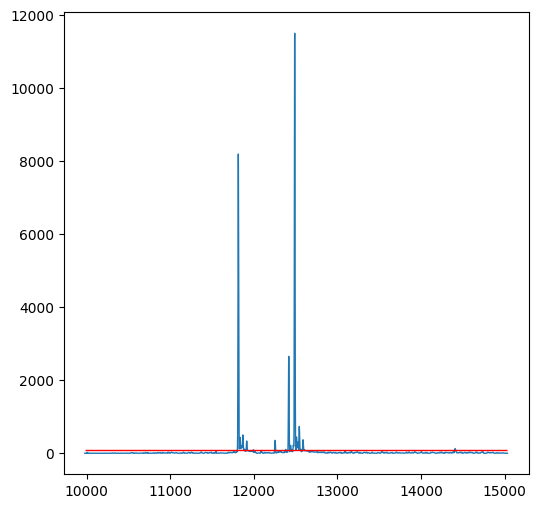

(5080,)
(10, 508)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


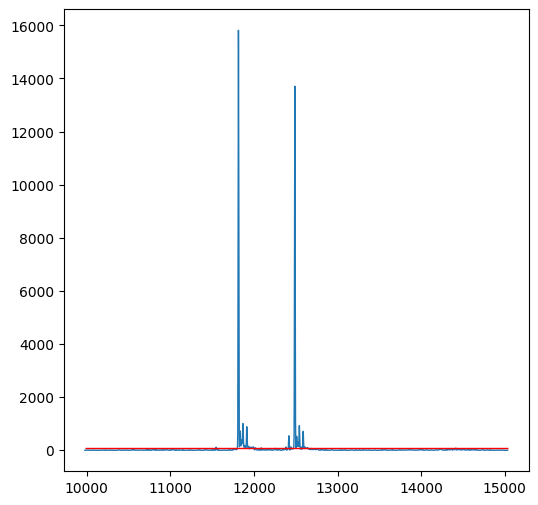

(5080,)
(10, 508)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


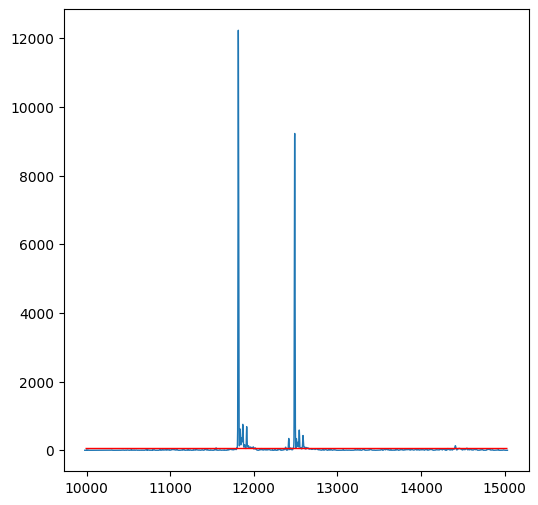

(5080,)
(10, 508)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


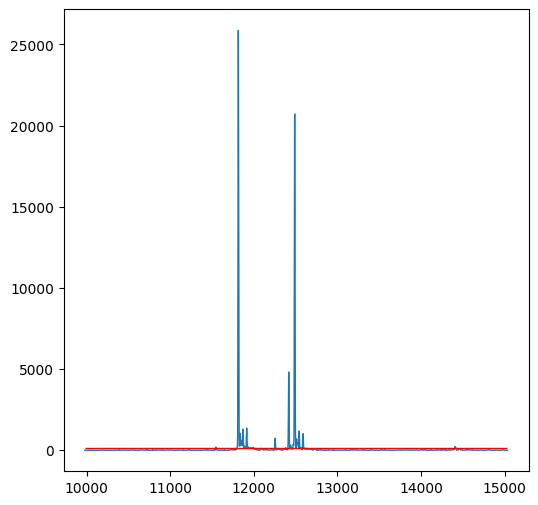

(5080,)
(10, 508)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


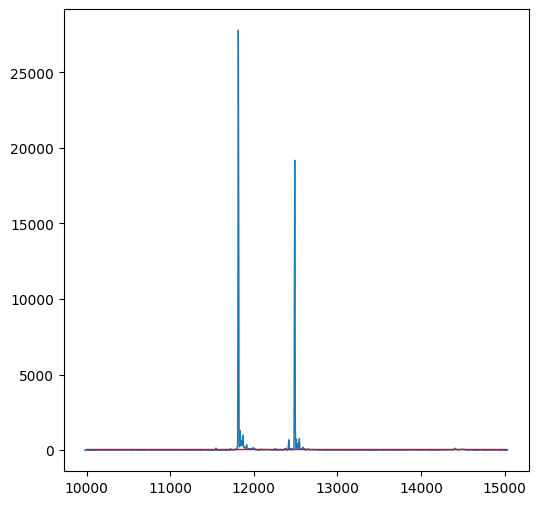

(5080,)
(10, 508)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


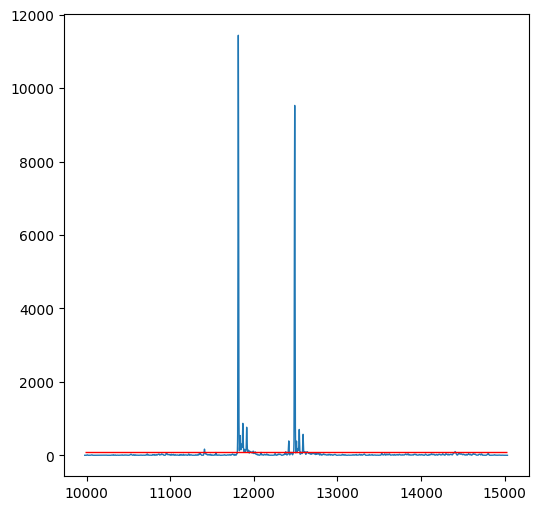

(5080,)
(10, 508)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


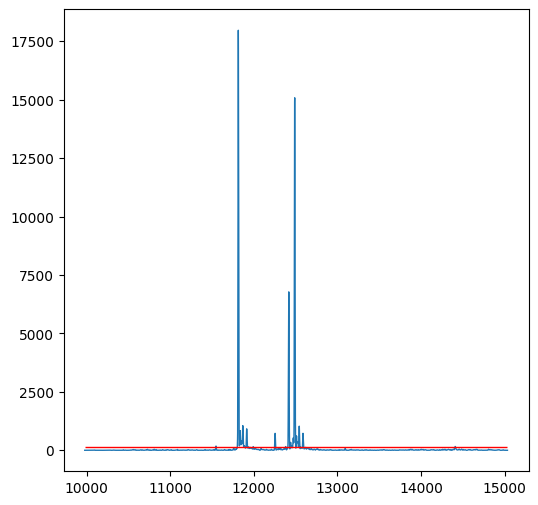

(5080,)
(10, 508)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


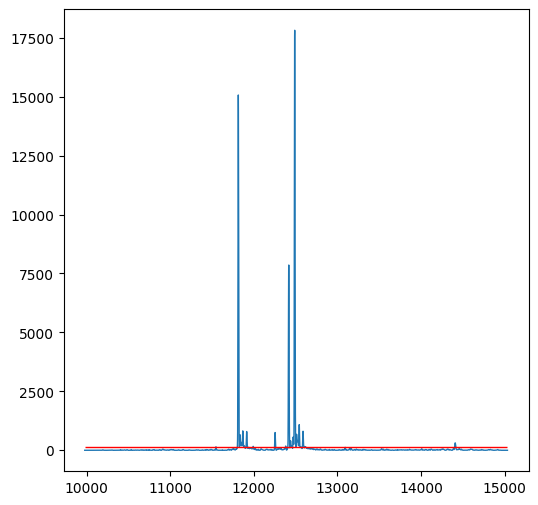

In [13]:
# add in deconvolved spectra background subtraction
# use datacompsub - taken from mass assign paper 
# add additional smoothing step? 
deconsubtype = 2
deconsmooth = 0
deconsubbuff = 1




for s in eng.data.spectra:
    
#     plt.plot(s.massdat[:,0],s.massdat[:,1],)
    new_size= (s.massdat[:,1].flatten().shape[0]//20+1)*20
    resamp= np.resize(s.massdat[:,1],new_size)
    print(resamp.shape)
    resamp=resamp.reshape((10,-1))
#     print(np.mean(np.max(resamp,axis=0)))
    print(resamp.shape)
#     print(np.max(resamp,axis=0).shape)
    fig, ax = plt.subplots(1, 1, figsize = (6, 6))
#     s.massdat2 = ud.datacompsub(s.massdat, deconsubbuff)
#     s.massdat3 = ud.datasimpsub(s.massdat,deconsubbuff)
#     s.massdat4=s.massdat
#     s.massdat4[:,1]= s.massdat[:, 1] - np.amin(s.massdat[:, 1])
    s.massdat5=s.massdat
    
    peak_thresh = np.mean(np.median(np.max(resamp,axis=0)))
#     s.massdat5 = ud.remove_noise(s.massdat, 30)
    
#     plt.xlim([13000, 14000])
    ax.plot(s.massdat[:,0],s.massdat[:,1],)
    ax.hlines(peak_thresh, np.min(s.massdat[:,0]),np.max(s.massdat[:,0]), color='red')
#     ax[1].violinplot(s.massdat[:,1])
#     ax[1].plot(s.massdat2[:,0], s.massdat2[:,1])
#     ax[1].plot(s.massdat5[:,0], s.massdat5[:,1])
    print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
    plt.show()

In [14]:
eng.config.peakthresh = 0.05

eng.pick_peaks()

Execution Time: 1.0749600999999984
Peak info saved to: D:\charlie HRMS data\PDRA Ocr23-Jan24 data\20240123\4 dC\UniDec_Figures_and_Files\4 dC_extracts.txt


In [15]:
# eng.config.beta

20240123 CMES026 AYLPETGPG +PfAPP 4dC 24h_1-1-6_1_8432.d


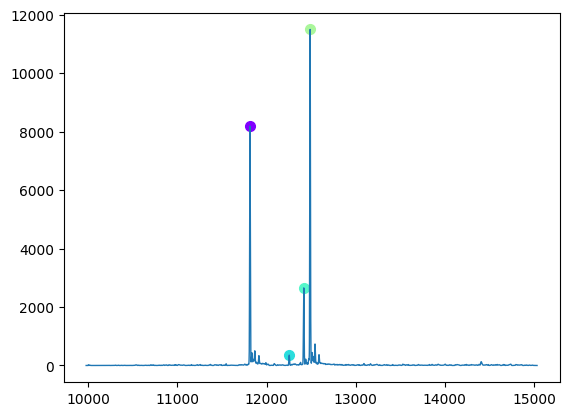

20240123 CMES026 AYLPETGPG +PfAPP 4dC 48h_1-1-15_1_8475.d


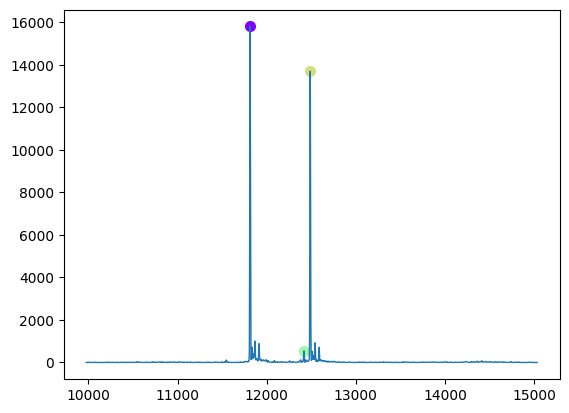

20240123 CMES026 AYLPETGP -PfAPP 4dC 48h_1-1-17_1_8474.d


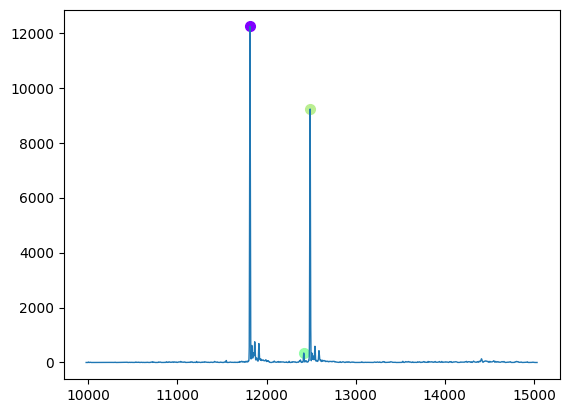

20240123 CMES026 AYLPETGPG -PfAPP 4dC 24h_2-2-22_1_8424.d


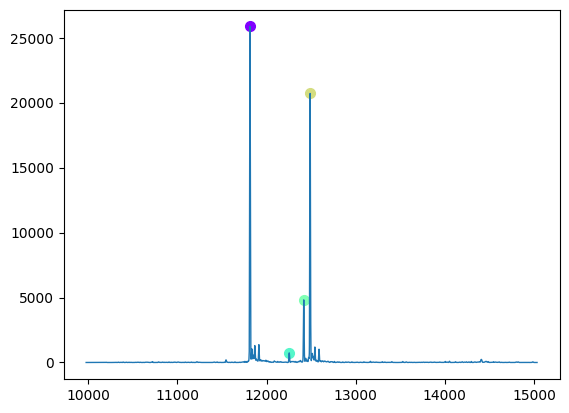

20240123 CMES026 AYLPETGP +PfAPP 4dC 48h_3-2-38_1_8473.d


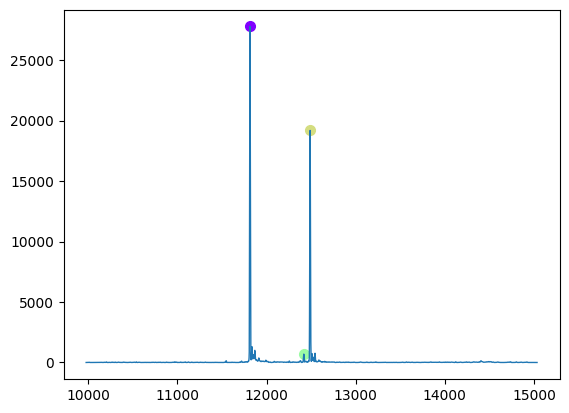

20240123 CMES026 AYLPETGPG -PfAPP 4dC 48h_3-2-31_1_8491.d


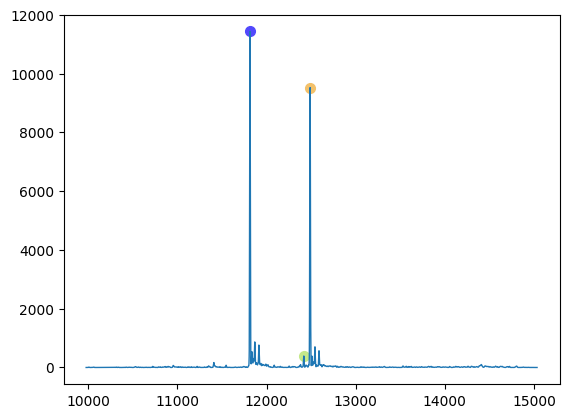

20240123 CMES026 AYLPETGP -PfAPP 4dC 24h_3-1-34_1_8529.d


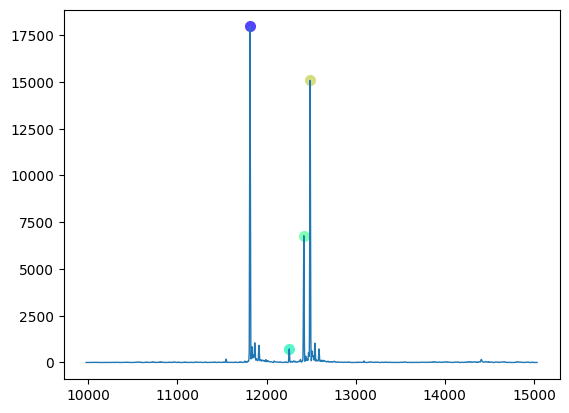

20240123 CMES026 AYLPETGP +PfAPP 4dC 24h_3-1-21_1_8528.d


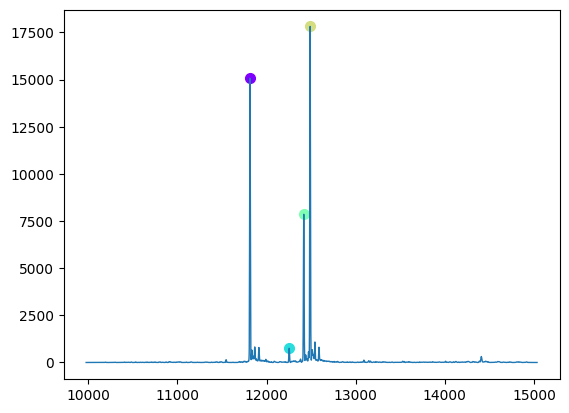

In [16]:
for s in eng.data.spectra:
    print(s.name)
    
    # match peaks to oligos
    match(s.pks.peaks, masslist, names, tolerance)
    
    
    
    plt.plot(s.massdat[:,0],s.massdat[:,1],)
    for p in s.pks.peaks:
#         plt.scatter(p.mass, p.height)
        if p.label != "" and p.height > peak_thresh:
            
            plt.scatter(p.mass, p.height, color = p.color)
    plt.show()
    
# dct = {"Label":label, "Mass":mass, "Height":height, "Name":s_name}    

In [17]:
peak_thresh

145.26094

In [18]:
dfs = []
for s in eng.data.spectra:
    counter = 0
    label = []
    mass = []
    height = []
    for p in s.pks.peaks:
    
        if p.label !="" and p.height>peak_thresh:
            print(p.height, peak_thresh)
            label.append(p.label)
            mass.append(p.mass)
            height.append(p.height)
            counter = counter+1
    s_name = [s.name]*counter

    dct = {"Label":label, "Mass":mass, "Height":height, "Name":s_name}
    df = pd.DataFrame(dct)
    df['Percentage_Labelling'] = (df.Height/df.Height.sum())*100
    dfs.append(df)
results_df = pd.concat(dfs)

8192.792 145.26094
353.01147 145.26094
2654.2622 145.26094
11499.388 145.26094
15812.775 145.26094
545.7529 145.26094
13705.704 145.26094
12231.67 145.26094
344.24164 145.26094
9226.499 145.26094
25864.086 145.26094
738.3082 145.26094
4819.929 145.26094
20707.777 145.26094
27780.324 145.26094
691.4623 145.26094
19184.732 145.26094
11438.606 145.26094
390.7378 145.26094
9528.025 145.26094
17966.875 145.26094
723.8301 145.26094
6775.4556 145.26094
15078.373 145.26094
15068.944 145.26094
752.3156 145.26094
7856.885 145.26094
17814.227 145.26094


In [19]:
results_df

,Label,Mass,Height,Name,Percentage_Labelling
0,GGG-CTB,11814.0,8192.791992,20240123 CMES026 AYLPETGPG +PfAPP 4dC 24h_1-1-...,36.092464
1,LPETGGG-CTB,12254.0,353.011475,20240123 CMES026 AYLPETGPG +PfAPP 4dC 24h_1-1-...,1.555154
2,YLPETGGG-CTB,12418.0,2654.262207,20240123 CMES026 AYLPETGPG +PfAPP 4dC 24h_1-1-...,11.693068
3,AYLPETGGG-CTB,12489.0,11499.387695,20240123 CMES026 AYLPETGPG +PfAPP 4dC 24h_1-1-...,50.659317
0,GGG-CTB,11814.0,15812.775391,20240123 CMES026 AYLPETGPG +PfAPP 4dC 48h_1-1-...,52.596642
1,YLPETGGG-CTB,12418.0,545.752930,20240123 CMES026 AYLPETGPG +PfAPP 4dC 48h_1-1-...,1.815290
2,AYLPETGGG-CTB,12489.0,13705.704102,20240123 CMES026 AYLPETGPG +PfAPP 4dC 48h_1-1-...,45.588074
0,GGG-CTB,11814.0,12231.669922,20240123 CMES026 AYLPETGP -PfAPP 4dC 48h_1-1-1...,56.102379
1,YLPETGGG-CTB,12418.0,344.241638,20240123 CMES026 AYLPETGP -PfAPP 4dC 48h_1-1-1...,1.578915
2,AYLPETGGG-CTB,12489.0,9226.499023,20240123 CMES026 AYLPETGP -PfAPP 4dC 48h_1-1-1...,42.318710


In [33]:
results2 = pd.pivot(results_df, index='Name', columns='Label', values = ['Height','Percentage_Labelling']).fillna(0)

results2.reset_index(inplace=True)
results2


Name        Height  \
Label                                                    AYLPETGGG-CTB   
0      20240123 CMES026 AYLPETGP +PfAPP 4dC 24h_3-1-2...  17814.226562   
1      20240123 CMES026 AYLPETGP +PfAPP 4dC 48h_3-2-3...  19184.732422   
2      20240123 CMES026 AYLPETGP -PfAPP 4dC 24h_3-1-3...  15078.373047   
3      20240123 CMES026 AYLPETGP -PfAPP 4dC 48h_1-1-1...   9226.499023   
4      20240123 CMES026 AYLPETGPG +PfAPP 4dC 24h_1-1-...  11499.387695   
5      20240123 CMES026 AYLPETGPG +PfAPP 4dC 48h_1-1-...  13705.704102   
6      20240123 CMES026 AYLPETGPG -PfAPP 4dC 24h_2-2-...  20707.777344   
7      20240123 CMES026 AYLPETGPG -PfAPP 4dC 48h_3-2-...   9528.025391   

                                             Percentage_Labelling             \
Label       GGG-CTB LPETGGG-CTB YLPETGGG-CTB        AYLPETGGG-CTB    GGG-CTB   
0      15068.944336  752.315613  7856.884766            42.933739  36.317383   
1      27780.324219    0.000000   691.462280            40.256260  58.292812   
2      17966.875000  723.830078  6775.455566            37.189659  44.313927   
3      12231.669922    0.000000   344.241638            42.318710  56.102379   
4       8192.791992  353.011475  2654.262207            50.659317  36.092464   
5      15812.775391    0.000000   545.752930            45.588074  52.596642   
6      25864.085938  738.308228  4819.929199            39.723263  49.614494   
7      11438.606445    0.000000   390.737793            44.612354  53.558125   

                                
Label LPETGGG-CTB YLPETGGG-CTB  
0        1.813142    18.935734  
1        0.000000     1.450929  
2        1.785272    16.711145  
3        0.000000     1.578915  
4        1.555154    11.693068  
5        0.000000     1.815290  
6        1.416280     9.245962  
7        0.000000     1.829522

In [21]:
# conditions_input_df = pd.read_excel(os.path.join(directory, "Conditions_input.xlsx"))

In [22]:
peak_thresh

145.26094

In [23]:
results2.Name = results2['Name'].str.rstrip('.d')

In [24]:
# results2 = conditions_input_df.merge(results2, how='left', on="Name")

In [34]:
results2

Name        Height  \
Label                                                    AYLPETGGG-CTB   
0      20240123 CMES026 AYLPETGP +PfAPP 4dC 24h_3-1-2...  17814.226562   
1      20240123 CMES026 AYLPETGP +PfAPP 4dC 48h_3-2-3...  19184.732422   
2      20240123 CMES026 AYLPETGP -PfAPP 4dC 24h_3-1-3...  15078.373047   
3      20240123 CMES026 AYLPETGP -PfAPP 4dC 48h_1-1-1...   9226.499023   
4      20240123 CMES026 AYLPETGPG +PfAPP 4dC 24h_1-1-...  11499.387695   
5      20240123 CMES026 AYLPETGPG +PfAPP 4dC 48h_1-1-...  13705.704102   
6      20240123 CMES026 AYLPETGPG -PfAPP 4dC 24h_2-2-...  20707.777344   
7      20240123 CMES026 AYLPETGPG -PfAPP 4dC 48h_3-2-...   9528.025391   

                                             Percentage_Labelling             \
Label       GGG-CTB LPETGGG-CTB YLPETGGG-CTB        AYLPETGGG-CTB    GGG-CTB   
0      15068.944336  752.315613  7856.884766            42.933739  36.317383   
1      27780.324219    0.000000   691.462280            40.256260  58.292812   
2      17966.875000  723.830078  6775.455566            37.189659  44.313927   
3      12231.669922    0.000000   344.241638            42.318710  56.102379   
4       8192.791992  353.011475  2654.262207            50.659317  36.092464   
5      15812.775391    0.000000   545.752930            45.588074  52.596642   
6      25864.085938  738.308228  4819.929199            39.723263  49.614494   
7      11438.606445    0.000000   390.737793            44.612354  53.558125   

                                
Label LPETGGG-CTB YLPETGGG-CTB  
0        1.813142    18.935734  
1        0.000000     1.450929  
2        1.785272    16.711145  
3        0.000000     1.578915  
4        1.555154    11.693068  
5        0.000000     1.815290  
6        1.416280     9.245962  
7        0.000000     1.829522

In [35]:
results_name = os.path.split(directory)[1]+"_results.xlsx"
results_path = os.path.join(directory,results_name)
results2.to_excel(results_path)